# Рубежный контроль 2

Гринин О.Е. ИУ5-62Б Вариант 5 <br>
Задача №2, набор данных №2

## Задача

Кластеризуйте данные с помощью двух алгоритмов класттеризации.<br>
Для группы ИУ5-62Б алгоритмы:<br>
MeanShift и иерархическая кластеризация.<br>
Сравните качество кластеризации с помощью следующих метрик качества кластеризации(если это возможно):<br>
1. Adjusted Rand index
2. Adjusted Mutual Information
3. Homogeneity, completeness, V-measure
4. Коэффициент силуэта

Сделаете выводы о том, какой алгоритм осуществляе более качественную кластеризацию на Вашем наборе данных. <br>
Датасет: https://scikitlearn.org/stable/modules/generated/sklearn.datasets.load_iris.html#sklearn.datasets.load_iris

## Загрузка данных

In [5]:
import numpy as np
import seaborn as sns
import pandas as pd
from scipy import stats
from typing import Dict, Tuple
from IPython.display import Image
from sklearn.datasets import load_iris
from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score, homogeneity_completeness_v_measure, silhouette_score
from sklearn.cluster import MeanShift, AgglomerativeClustering
from itertools import cycle, islice
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="ticks")

In [6]:
iris = load_iris()
for x in iris:
    print(x)

data
target
target_names
DESCR
feature_names
filename


In [7]:
# Признаки
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [8]:
# Метки
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [9]:
# Имена меток
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [10]:
# Разделение набора данных
x_axis = iris.data[:, 0]
y_axis = iris.data[:, 1]

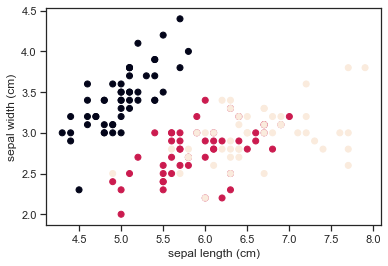

In [11]:
# Построение
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.scatter(x_axis, y_axis, c=iris.target)
plt.show()

In [21]:
data = pd.DataFrame(data = np.c_[iris.data[:, 0], iris.data[:, 1]],
                   columns = ['total_phenols', 'color_intensity'])

In [22]:
data.head()

,total_phenols,color_intensity
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


In [14]:
data.shape

(150, 2)

In [15]:
def do_clustering(cluster_dataset, method):
    # Кластеризация для данных примера
    temp_cluster = method.fit_predict(cluster_dataset)
    return temp_cluster

In [29]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

def claster_metrics(method, data, true_y):
    # Вычисление метрик кластеризации
    result_Method = do_clustering(data, method)
    list = []
    list.append(adjusted_rand_score(true_y, result_Method))
    list.append(adjusted_mutual_info_score(true_y, result_Method))
    h, c, v = homogeneity_completeness_v_measure(true_y, result_Method)
    list.append(h)
    list.append(c)
    list.append(v)
    list.append(silhouette_score(data, result_Method))
    
    names = ['ARI', 'AMI', 'Homogenity', 'Completeness', 'V-measure', 'Silhouette']
    for i in range(0, 6):
        print('{}: {};'.format(names[i], list[i]))

## MeanShift 

In [19]:
result_MeanShift = do_clustering(data, MeanShift())

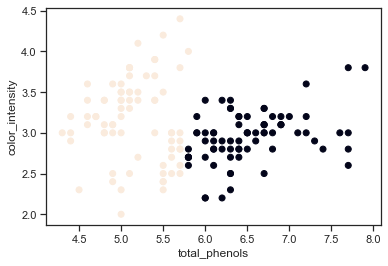

In [23]:
plt.xlabel('total_phenols')
plt.ylabel('color_intensity')
plt.scatter(data['total_phenols'], data['color_intensity'], c = result_MeanShift)
plt.show()

## Иерархическая кластеризация

In [24]:
result_AgglomerativeClustering = do_clustering(data, AgglomerativeClustering(n_clusters=3))

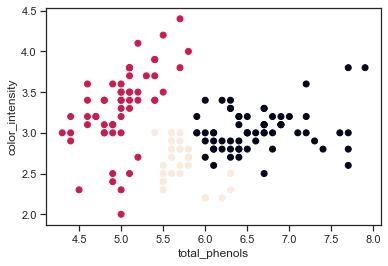

In [25]:
plt.xlabel('total_phenols')
plt.ylabel('color_intensity')
plt.scatter(data['total_phenols'], data['color_intensity'], c = result_AgglomerativeClustering)
plt.show()

## Сравнение качества кластеризации

In [30]:
claster_metrics(MeanShift(), data, iris.target)

ARI: 0.3944401908806803;
AMI: 0.3515861283849521;
Homogenity: 0.355574438925241;
Completeness: 0.5636444355672562;
V-measure: 0.43606057162569084;
Silhouette: 0.4644681851183547;


In [31]:
claster_metrics(AgglomerativeClustering(n_clusters=3), data, iris.target)

ARI: 0.5112126489117526;
AMI: 0.513037373102627;
Homogenity: 0.5190720845536648;
Completeness: 0.5414839345877656;
V-measure: 0.5300412040588491;
Silhouette: 0.3653346819163389;


Вывод:
- Иерархическая кластеризация оказалась более качественной по сранению с MeanShift.